In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib.image as mpimg
from matplotlib.lines import Line2D
import scipy.io as scio
import os


In [2]:
speech_tone_dict = {
    'sub-01':[np.array([85, 69, 68, 84, 86, 101, 83, 54, 70, 89, 100, 81]),
        np.array([54, 84, 53, 85, 99, 66, 83, 88, 98, 67, 68, 101, 82, 69, 70, 100, 86, 72, 73, 39, 97, 81, 38, 52, 87, 102, 71, 55, 89, 90, 56, 80, 104, 103, 93, 76, 118, 105, 94, 74, 120, 51, 109, 59, 114, 78, 125, 64])],
    'sub-02': [np.array([16, 19, 36, 17, 18, 34, 15, 35]),
        np.array([19, 38, 20, 37, 34, 54, 23, 21, 56, 15, 16, 17, 57, 35, 9, 40, 18, 42, 13, 2, 62, 12, 36, 29, 30, 1, 39, 63, 44, 58, 11, 14, 33, 10, 55, 32, 28, 53])],
    'sub-03':[np.array([9, 60, 59, 31, 47, 14, 41, 29, 7, 5, 13, 10]),
        np.array([40, 22, 43, 5, 60, 182, 59, 9, 24, 52, 21, 8, 27, 20, 28, 45, 181, 44, 15, 66, 46, 12, 18, 37, 30, 78, 23, 29, 63, 25, 13, 11, 42, 36, 61, 39, 77, 7, 62, 10, 53, 31, 41, 65, 34, 96, 165, 19, 4, 47, 38, 56, 26, 80, 35, 64, 17, 196, 112, 195, 32, 14, 180, 33, 79, 179, 6, 55, 223])],
    'sub-04': [np.array([43, 56, 57, 184, 67, 75, 39, 71, 44, 40, 59]),
        np.array([55, 59, 60, 89, 88, 200, 26, 73, 42, 75, 72, 43, 84, 91, 184, 56, 58, 183, 199, 90, 83, 87, 71, 63, 39, 31, 67, 74, 146, 168, 132, 40, 30, 46, 29, 45, 41, 69, 57, 70, 68, 38, 15, 139, 44, 28, 54, 131, 53, 27, 14, 47, 4, 92, 93, 3, 64, 77, 167, 13, 50, 65, 62, 49, 66, 52, 94, 95, 185, 82, 103, 201, 133, 19, 78, 11, 23, 79, 86])]
}

In [3]:
def plot_indiv_brain2D(sub,
                       repre_corr=None,
                       color='k',
                       name=None,
                       highlight=None,
                       hl_color='r',
                       hl_size=5,
                       default_size=3):
    
    img = mpimg.imread(os.path.join(os.getcwd().rstrip('/code'), f"derivatives/Brain2D/{sub}/{sub}_brain2D.png"))
    xy = scio.loadmat(os.path.join(os.getcwd().rstrip('/code'), f"derivatives/Brain2D/{sub}/{sub}_elec_pos2D.mat"))['elecmatrix'][:]
    highlight = set(np.asarray(highlight).astype(int)) if highlight is not None else set()
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(img, cmap='Greys_r', alpha=0.7)

    for i, (x, y) in enumerate(xy):
        if i in highlight:
            ax.plot(x, y, 'o', color=hl_color, markersize=hl_size, zorder=3)
        else:
            ax.plot(x, y, 'o', color=color,  markersize=default_size, zorder=2)
    ax.axis("off")

    # Save
    if name is not None:
        plt.savefig(f"{sub}{name}.svg", format="svg", dpi=300)
    plt.show()

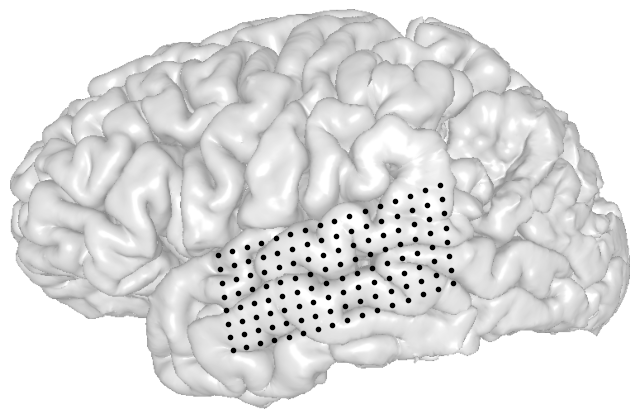

In [4]:
plot_indiv_brain2D(sub='sub-01')

In [5]:
def plot_indiv_brain2D_with_elecs(
        sub,
        color='k',
        name=None,
        highlight=None,
        hl_color='r',
        hl_size=5,
        sup_highlight=None,
        hl_sup_color='orange',
        hl_sup_size=7,
        default_size=3):

    img = mpimg.imread(os.path.join(os.getcwd().rstrip('/code'), f"derivatives/Brain2D/{sub}/{sub}_brain2D.png"))
    xy = scio.loadmat(os.path.join(os.getcwd().rstrip('/code'), f"derivatives/Brain2D/{sub}/{sub}_elec_pos2D.mat"))['elecmatrix'][:]

    highlight     = set(np.asarray(highlight).astype(int))     if highlight     is not None else set()
    sup_highlight = set(np.asarray(sup_highlight).astype(int)) if sup_highlight is not None else set()

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img, cmap='Greys_r', alpha=0.7)

    for i, (x, y) in enumerate(xy):
        if i in sup_highlight:
            ax.plot(x, y, 'o',
                    markersize=hl_sup_size,
                    markerfacecolor=hl_sup_color,
                    markeredgecolor='k',
                    markeredgewidth=1,
                    zorder=3)
        elif i in highlight:
            ax.plot(x, y, 'o',
                    markersize=hl_size,
                    markerfacecolor=hl_color,
                    markeredgecolor='none',
                    zorder=3)
        else:
            ax.plot(x, y, 'o',
                    markersize=default_size,
                    markerfacecolor=color,
                    markeredgecolor='none',
                    zorder=2)

    ax.axis("off")
    if name is not None:
        plt.savefig(f"{sub}{name}.svg",
                    format="svg", dpi=300, bbox_inches='tight')
    plt.show()

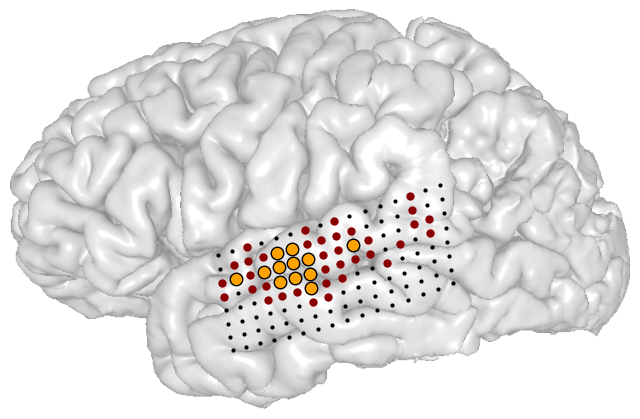

In [6]:
sub = 'sub-01'
plot_indiv_brain2D_with_elecs(sub, hl_color='#890000', highlight=speech_tone_dict[sub][1], sup_highlight=speech_tone_dict[sub][0], hl_sup_color='#FCA300', hl_size=6, hl_sup_size=9)

In [7]:
def plot_warp_multi_brain2D(
        plot_dict,
        hem,
        subs, name=None,
        color="k",
        hl_color="r",
        hl_size=4,
        hl_sup_color="orange",
        hl_sup_size=6,
        default_size=3):
    
    if hem == 'lh': 
        img = mpimg.imread(os.path.join(os.getcwd().rstrip('/code'), f"derivatives/Brain2D/sub-01/cvs_avg35_inMNI152_{hem}_brain2D.png"))
    elif hem == 'rh':
        img = mpimg.imread(os.path.join(os.getcwd().rstrip('/code'), f"derivatives/Brain2D/sub-03/cvs_avg35_inMNI152_{hem}_brain2D.png"))
    else:
        print('Hem should be lh or rh')

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(img, cmap='Greys_r', alpha=0.7)

    # ---------------------------------------------------------------
    # Decide which subjects to plot
    # ---------------------------------------------------------------
    if subs is None:
        subs = list(plot_dict.keys())
    else:
        missing = [sub for sub in subs if sub not in plot_dict]
        if missing:
            raise KeyError(f"Subject(s) not found in plot_dict: {missing}")

    # ---------------------------------------------------------------
    # Iterate through subjects in user-specified order
    # ---------------------------------------------------------------
    markers = ['o', 's']
    i = 0 
    for sub in subs:
        marker = markers[i]
        arrays = plot_dict[sub]
        sup_arr = set(arrays[0].astype(int)) if arrays and arrays[0] is not None else set()
        hl_arr  = set(arrays[1].astype(int)) if len(arrays) > 1 and arrays[1] is not None else set()

        xy = scio.loadmat(os.path.join(os.getcwd().rstrip('/code'), f"derivatives/Brain2D/{sub}/{sub}_warped_elec_pos2D.mat"))['elecmatrix'][:]

        for idx, (x, y) in enumerate(xy):
            if idx in sup_arr:
                ax.plot(x, y, marker,
                        markersize=hl_sup_size,
                        markerfacecolor=hl_sup_color,
                        markeredgecolor="k",
                        markeredgewidth=1.2,
                        zorder=4)
            elif idx in hl_arr:
                ax.plot(x, y, marker,
                        markersize=hl_size,
                        markerfacecolor=hl_color,
                        markeredgecolor="none",
                        zorder=3)
            else:
                ax.plot(x, y, marker,
                        markersize=default_size,
                        markerfacecolor=color,
                        markeredgecolor="none",
                        zorder=2)
        i+=1

    ax.axis("off")

    if name is not None:
        fname = name if name.lower().endswith(".svg") else f"{name}.svg"
        plt.savefig(fname, format="svg", dpi=300, bbox_inches="tight")
    plt.show()

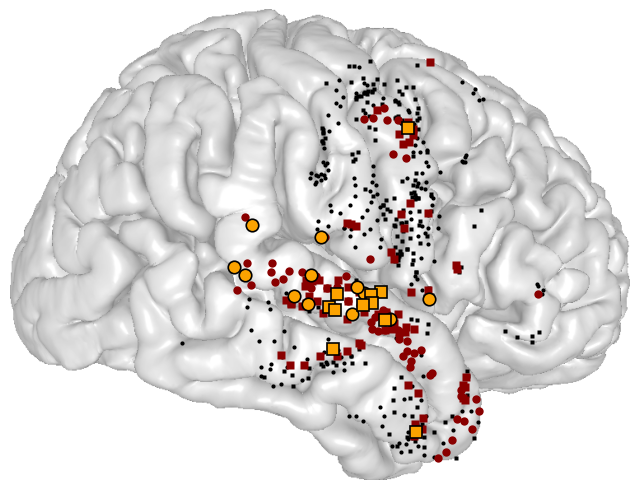

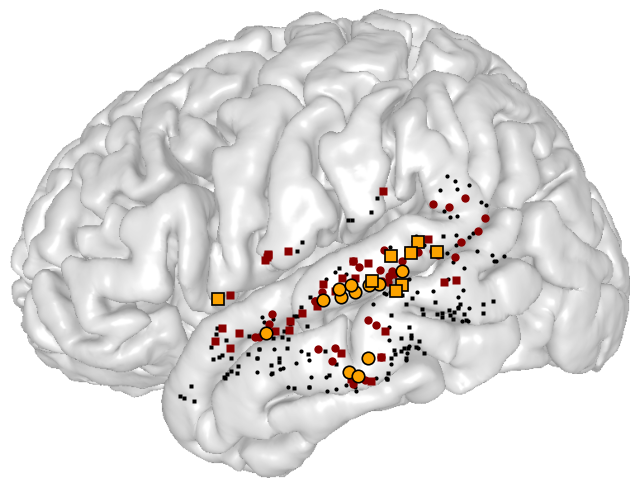

In [8]:
plot_warp_multi_brain2D(
    speech_tone_dict,
    hem='rh',
    subs=['sub-03', 'sub-04'],
    hl_color='#890000',
    hl_sup_color='#FCA300',
    hl_size=6,
    hl_sup_size=9
)
plot_warp_multi_brain2D(
    speech_tone_dict,
    hem='lh',
    subs=['sub-01', 'sub-02'],
    hl_color='#890000',
    hl_sup_color='#FCA300',
    hl_size=6,
    hl_sup_size=9
)